# Importing Library


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings("ignore")

# Reading The Data Set


In [4]:
coke= pd.read_csv("CocaCola_Sales_Rawdata.csv")

In [5]:
coke

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# Performing EDA

In [6]:
coke.columns

Index(['Quarter', 'Sales'], dtype='object')

In [7]:
coke.Quarter

0     Q1_86
1     Q2_86
2     Q3_86
3     Q4_86
4     Q1_87
5     Q2_87
6     Q3_87
7     Q4_87
8     Q1_88
9     Q2_88
10    Q3_88
11    Q4_88
12    Q1_89
13    Q2_89
14    Q3_89
15    Q4_89
16    Q1_90
17    Q2_90
18    Q3_90
19    Q4_90
20    Q1_91
21    Q2_91
22    Q3_91
23    Q4_91
24    Q1_92
25    Q2_92
26    Q3_92
27    Q4_92
28    Q1_93
29    Q2_93
30    Q3_93
31    Q4_93
32    Q1_94
33    Q2_94
34    Q3_94
35    Q4_94
36    Q1_95
37    Q2_95
38    Q3_95
39    Q4_95
40    Q1_96
41    Q2_96
Name: Quarter, dtype: object

In [8]:
coke = coke.set_index(['Quarter'])

In [9]:
coke

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [11]:
coke.isna().value_counts()

Sales
False    42
dtype: int64

In [10]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [12]:
coke.shape

(42, 1)

In [13]:
coke.duplicated().sum()

0

In [14]:
import re

In [15]:
coke.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

In [16]:
coke.index = coke.index.str.replace(r'(Q\d)_(\d+)', r'\2-\1')
coke.head()

,Sales
Quarter,
86-Q1,1734.827000
86-Q2,2244.960999
86-Q3,2533.804993
86-Q4,2154.962997
87-Q1,1547.818996


In [17]:
coke.index = pd.PeriodIndex(coke.index, freq='Q').to_timestamp()
coke.head()

,Sales
Quarter,
2086-01-01,1734.827000
2086-04-01,2244.960999
2086-07-01,2533.804993
2086-10-01,2154.962997
2087-01-01,1547.818996


# Visualizing plots and understanding the Time Series

# Line Plot


<AxesSubplot:xlabel='Quarter'>

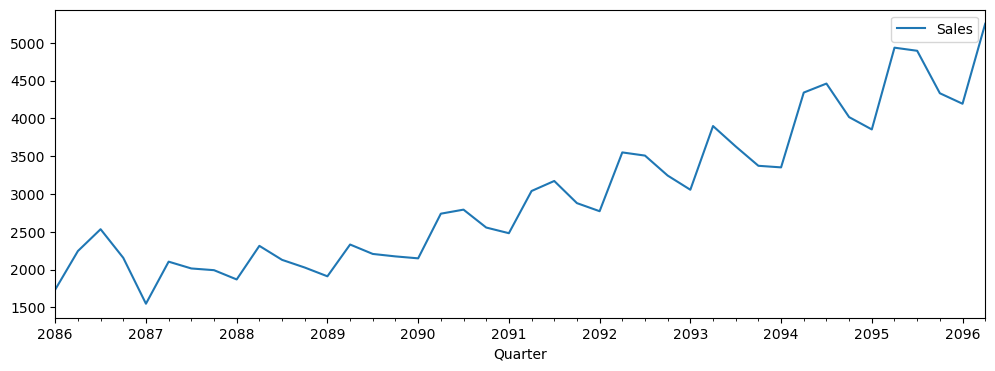

In [18]:
coke.plot(figsize=(12,4))

# Histogram


array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

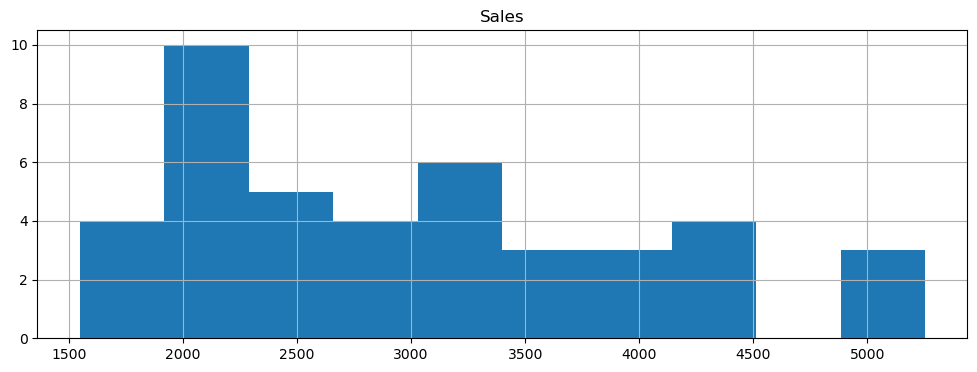

In [19]:
coke.hist(figsize=(12,4))

# Density Plot


<AxesSubplot:ylabel='Density'>

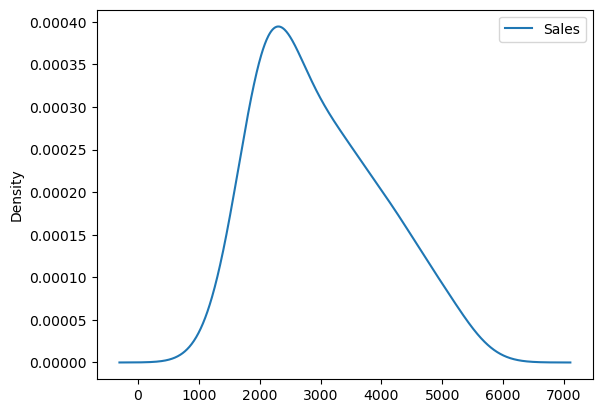

In [20]:
coke.plot(kind='kde')

# 1- Moving Average

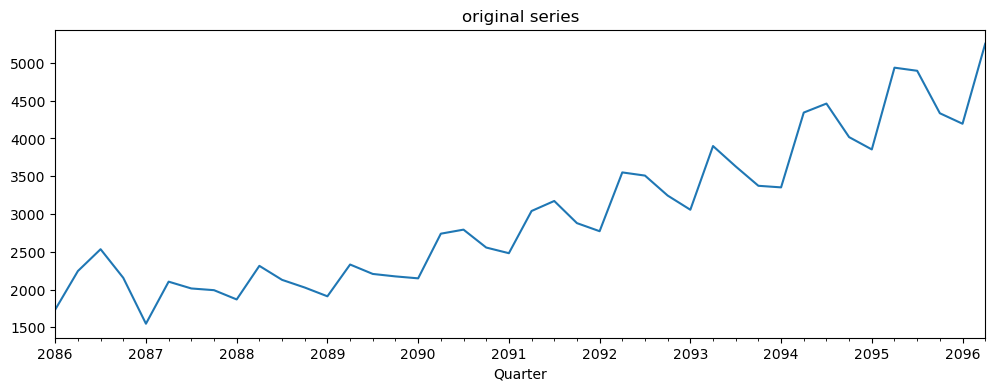

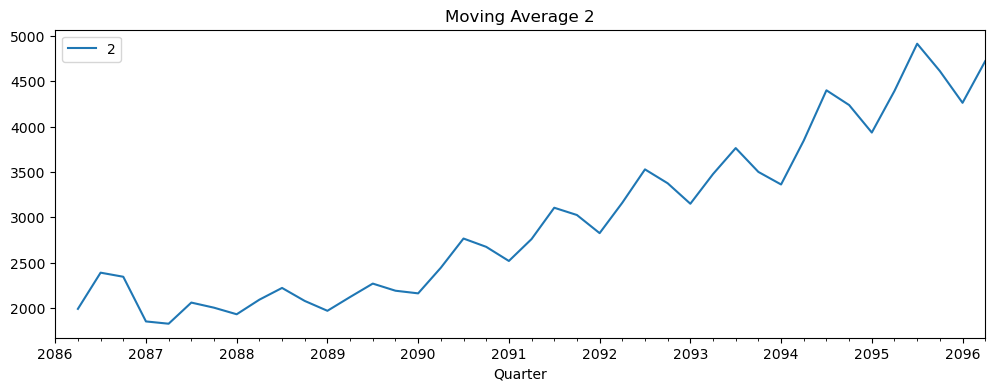

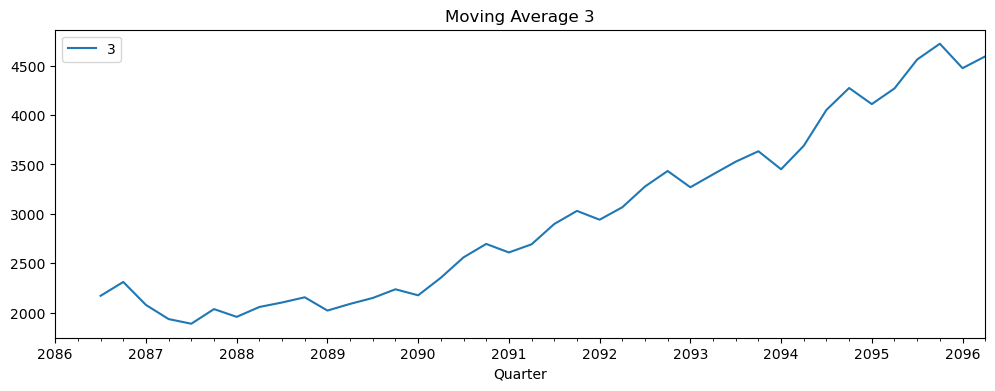

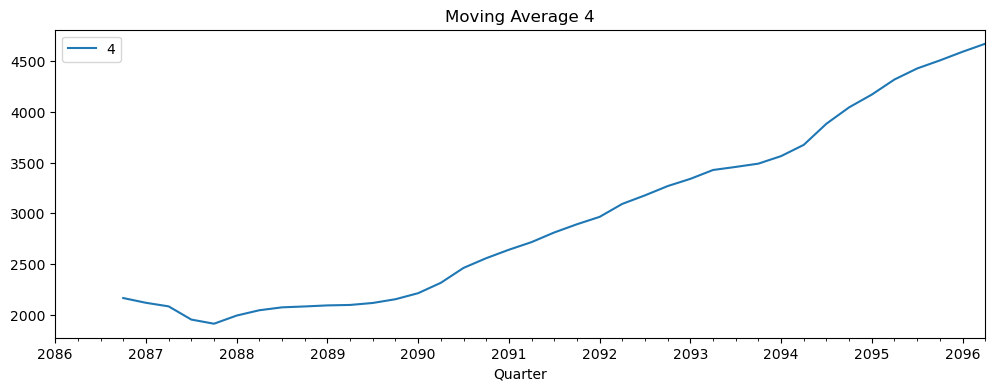

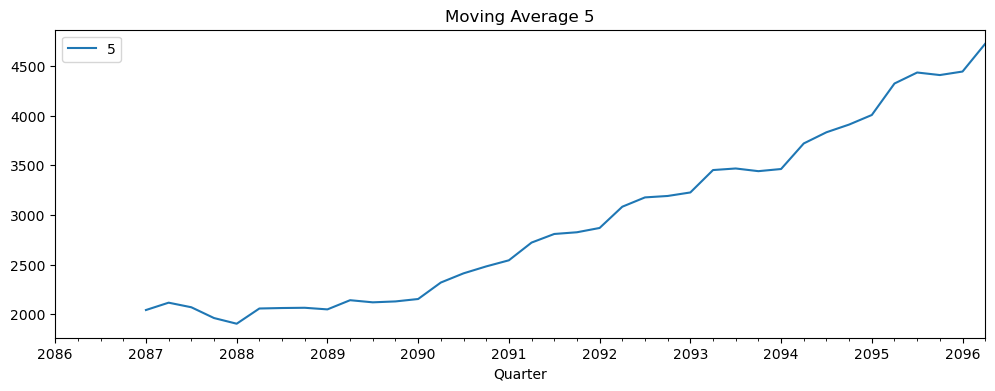

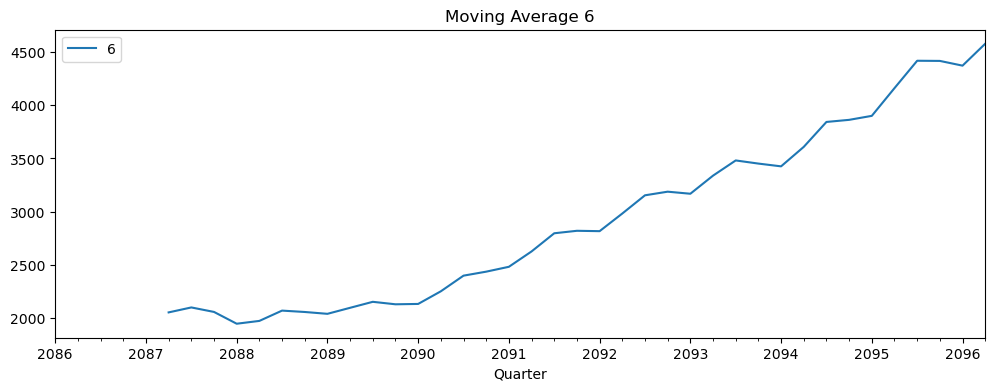

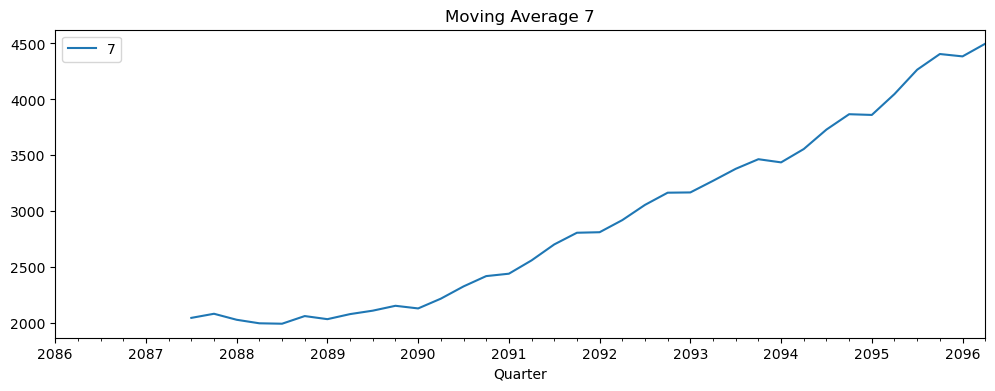

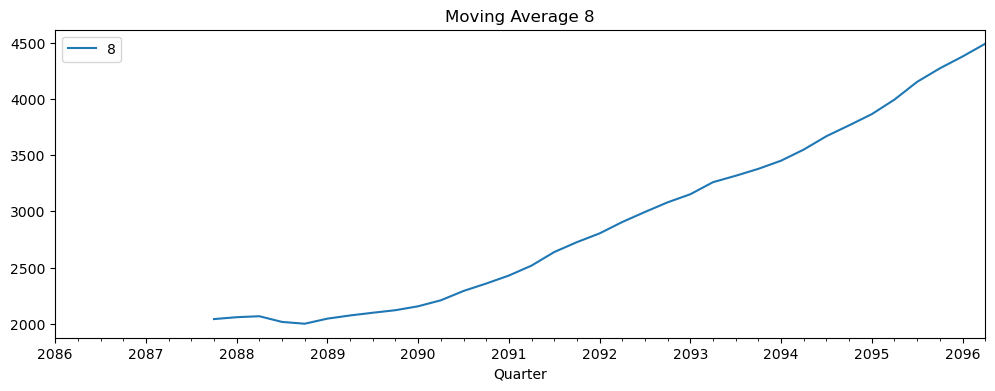

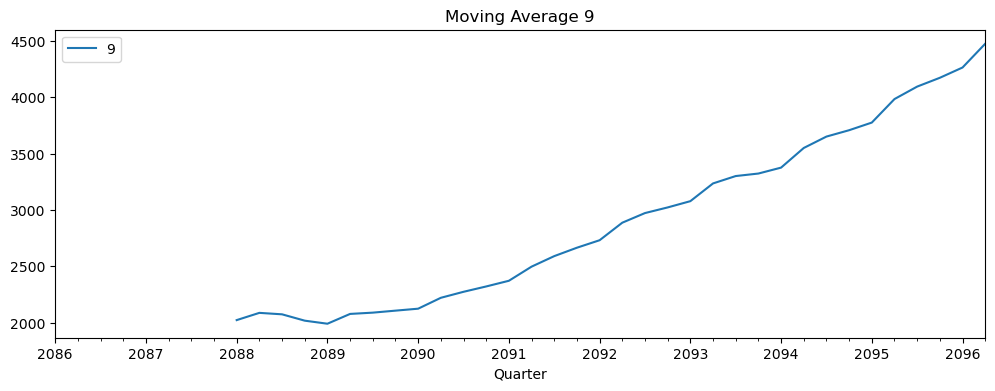

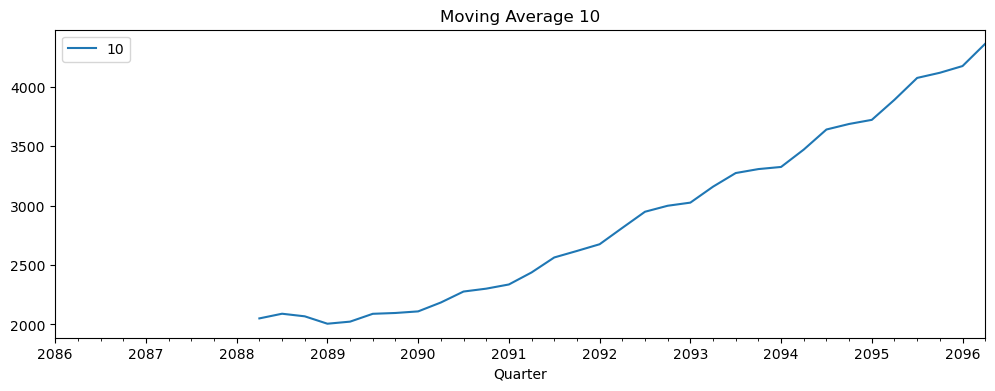

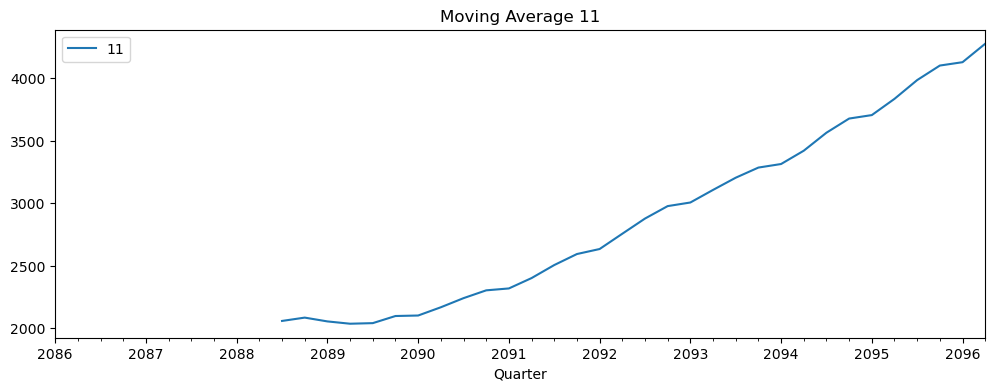

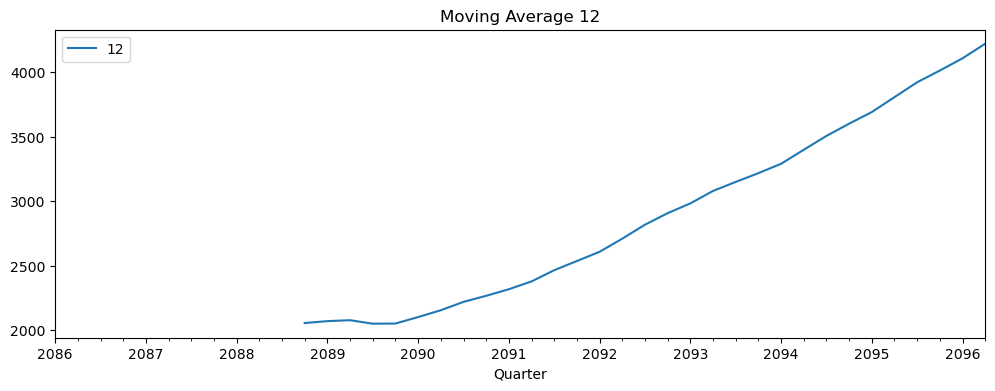

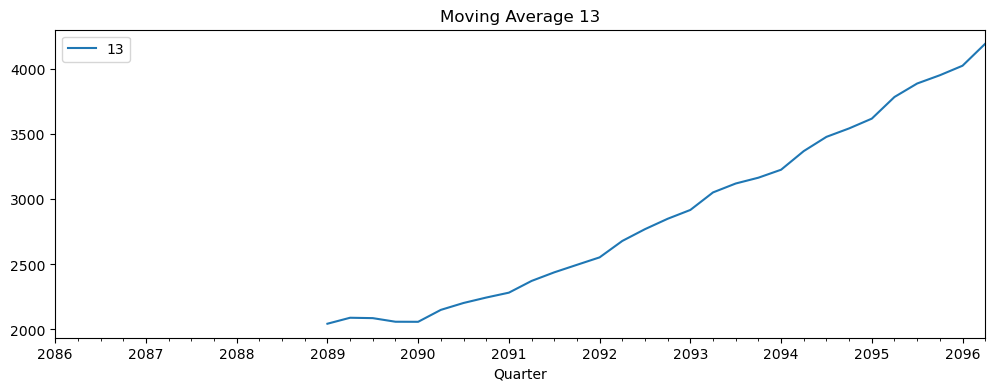

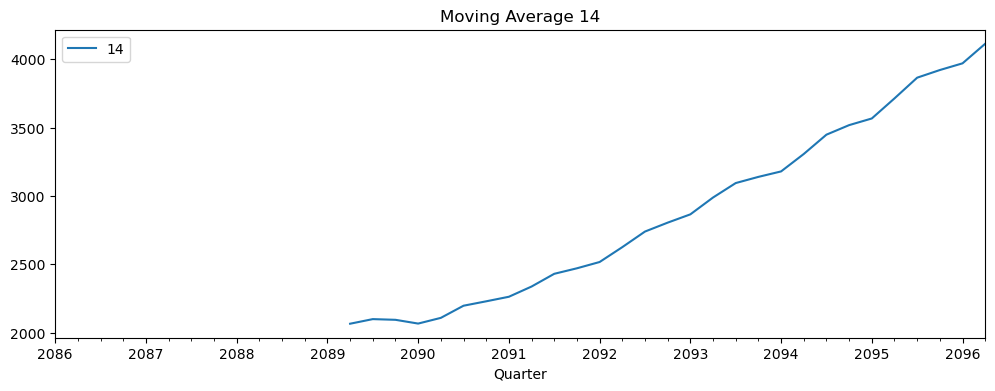

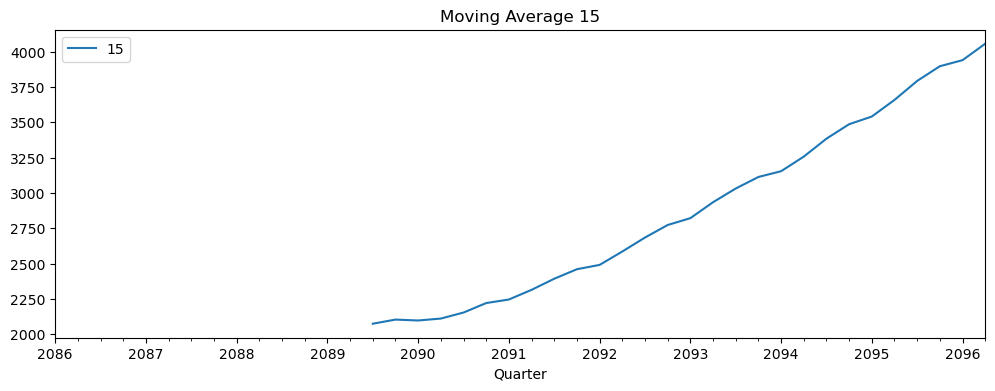

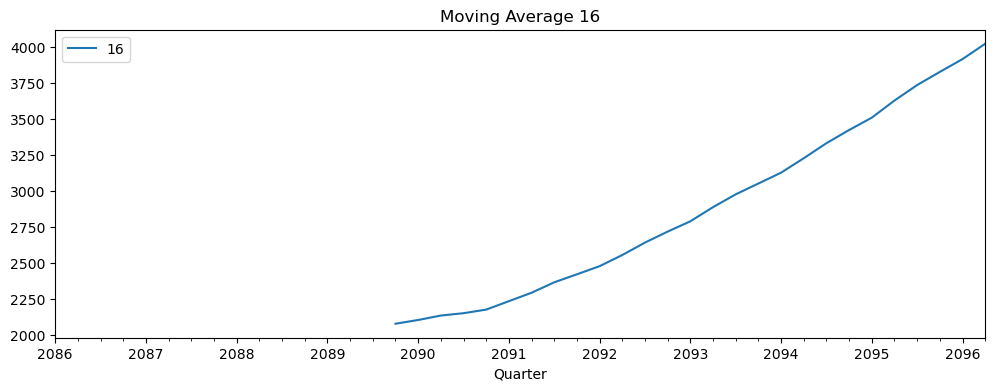

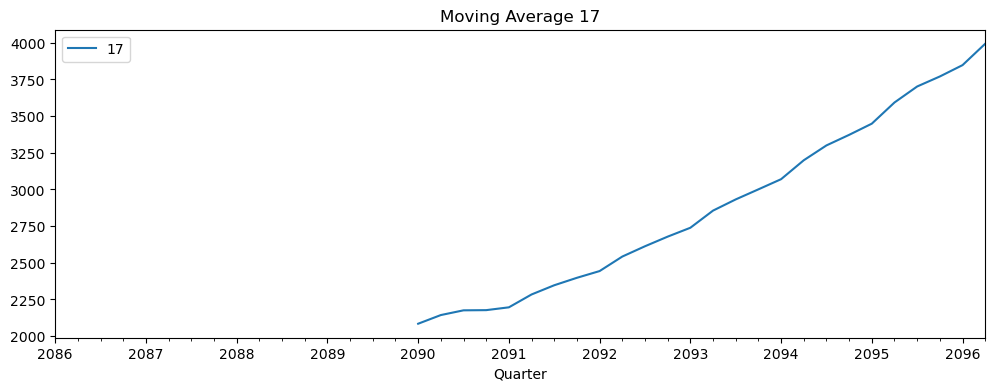

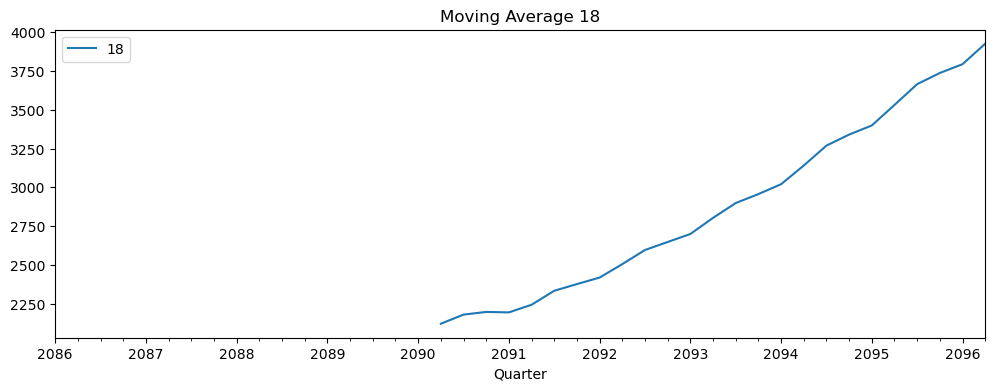

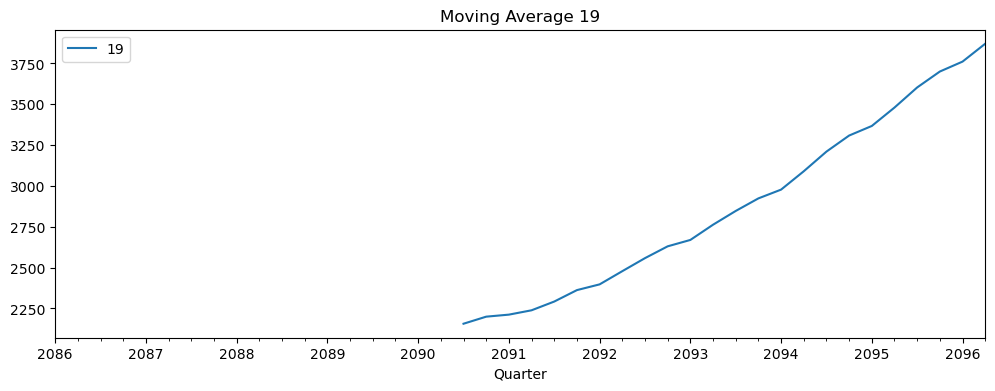

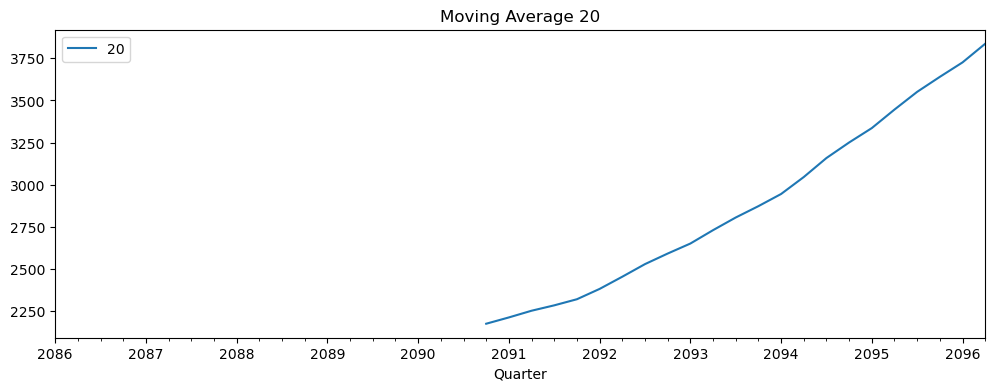

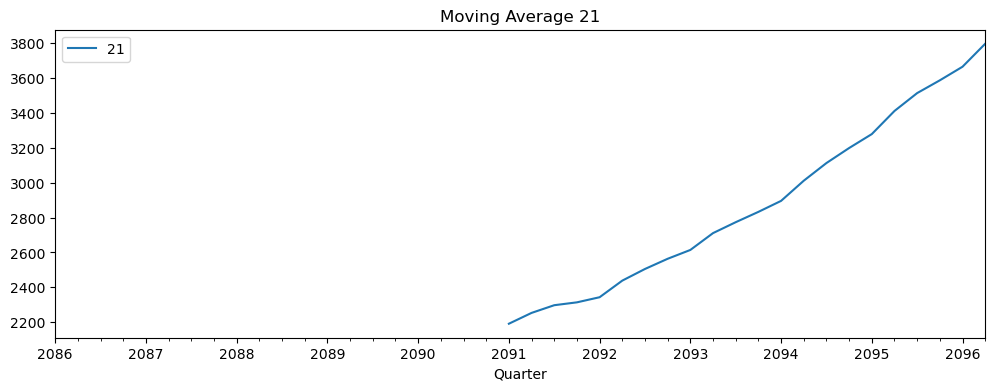

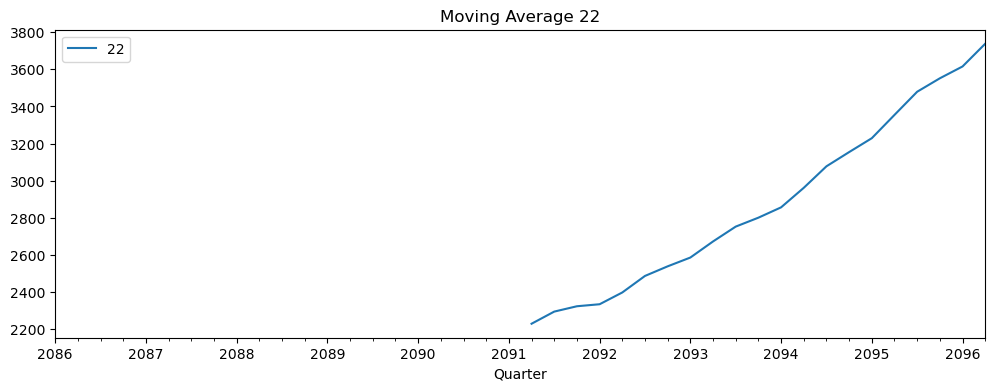

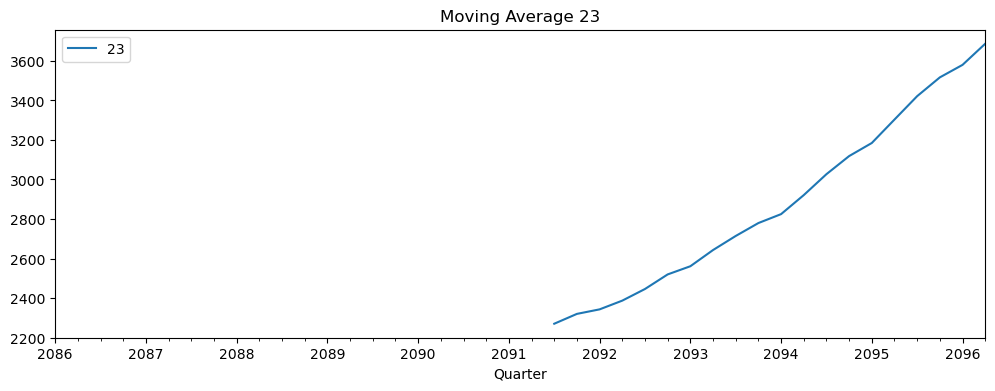

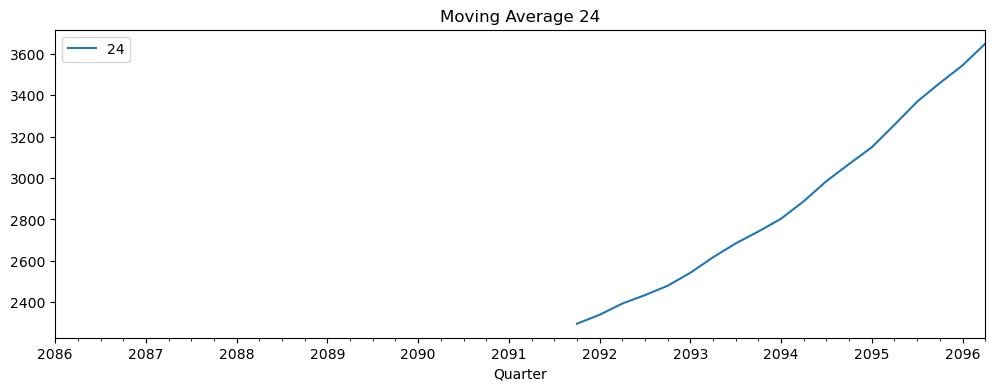

In [21]:
plt.figure(figsize=(12,4))
coke.Sales.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    coke["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

# Time Series Decomposition Plot

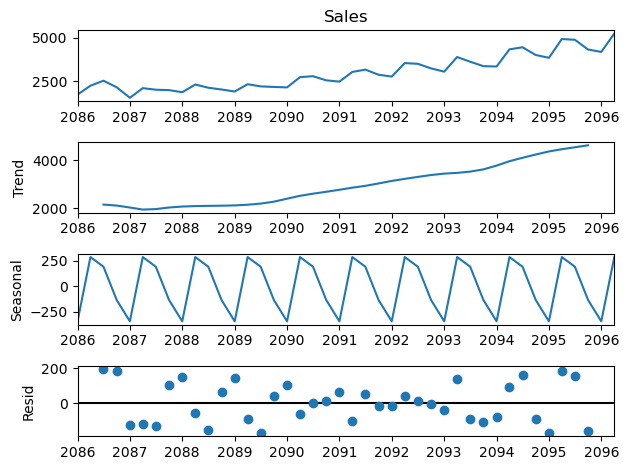

In [22]:
decompose_ts_add = seasonal_decompose(coke.Sales,period=4)
decompose_ts_add.plot()
plt.show()

# Divinding The Data Into Training And Testing Data


In [51]:
Train = coke.head(30)
Test = coke.tail(12)

In [27]:
len(coke)

42

In [28]:
print("Total records in train set:",len(Train))
print("Total records in test set:",len(Test))


Total records in train set: 30
Total records in test set: 12


In [29]:
df_mva=coke.copy()

In [30]:
train_len=30

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
roll_value=[]
rmse_value=[]

for i in range(4,30,4):
    df_mva['ma_forecast'] = df_mva['Sales'].rolling(i).mean()
    df_mva['ma_forecast'][train_len:] = df_mva['ma_forecast'][train_len-1]
    rmse_ma = mean_squared_error(Test['Sales'],df_mva['ma_forecast'][train_len:],squared=False).round(2)
    roll_value.append(i)
    rmse_value.append(rmse_ma)

In [33]:
D=pd.DataFrame({'Rolling window':roll_value,'rmse':rmse_value})
D

,Rolling window,rmse
0,4,986.03
1,8,1124.51
2,12,1282.40
3,16,1454.49
4,20,1600.25
5,24,1706.78
6,28,1778.29


In [34]:
df_mva['ma_forecast'] = df_mva['Sales'].rolling(4).mean()
df_mva['ma_forecast'][train_len:] = df_mva['ma_forecast'][train_len-1]
rmse_ma = mean_squared_error(Test['Sales'],df_mva['ma_forecast'][train_len:],squared=False).round(2)
rmse_ma

986.03

# 2-Simple Exponential Smoothing

In [35]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [36]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])

In [37]:
rmse_ses = mean_squared_error(Test['Sales'],pred_ses,squared=False).round(2)
rmse_ses

1153.7

# 3-Holt's method

In [38]:
from statsmodels.tsa.holtwinters import Holt

In [39]:
holt_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = Test.index[0],end = Test.index[-1])

In [40]:
rmse_holt = mean_squared_error(Test['Sales'],pred_holt,squared=False).round(2)
rmse_holt

559.52

# 4-holt's Exponential Smoothing

#  4.1 Additive Method

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [42]:
hes_add_add = ExponentialSmoothing(Train['Sales'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hes_add_add = hes_add_add.predict(start = Test.index[0],end = Test.index[-1])

In [43]:
rmse_hes_add_add = mean_squared_error(Test['Sales'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

253.96

# 4.2 Multiplicative Method

In [44]:
hes_mul_add = ExponentialSmoothing(Train['Sales'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = Test.index[0],end = Test.index[-1])

In [45]:
rmse_hes_mul_add = mean_squared_error(Test['Sales'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul_add

469.49

# 5-ARIMA model

# Visualization of ACF(Auto Correlation Function) plot 

In [52]:
from statsmodels.graphics.tsaplots import plot_acf

# Show Autocorrelation upto lag 20


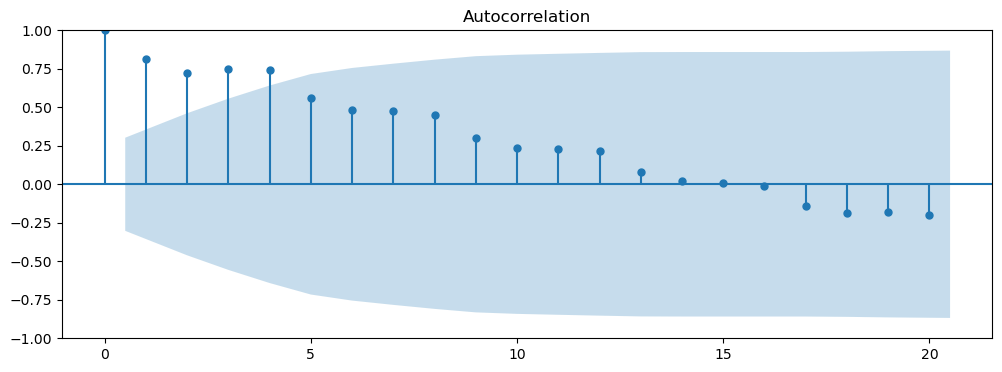

In [54]:
plt.figure(figsize=(12,4))
acf_plot = plot_acf( coke['Sales'],ax=plt.gca(),lags=20)
plt.show()

ACF plot: it is merely a bar chart of the coefficients of correlation between a time series and lags of itself. 
and the plot is showing that THE AUTO CORRELATION IS SIGNIFICANT FOR LAG -1

# Visualization of PACF(Partial Auto Correlation Function) plot 

In [55]:
from statsmodels.graphics.tsaplots import plot_pacf

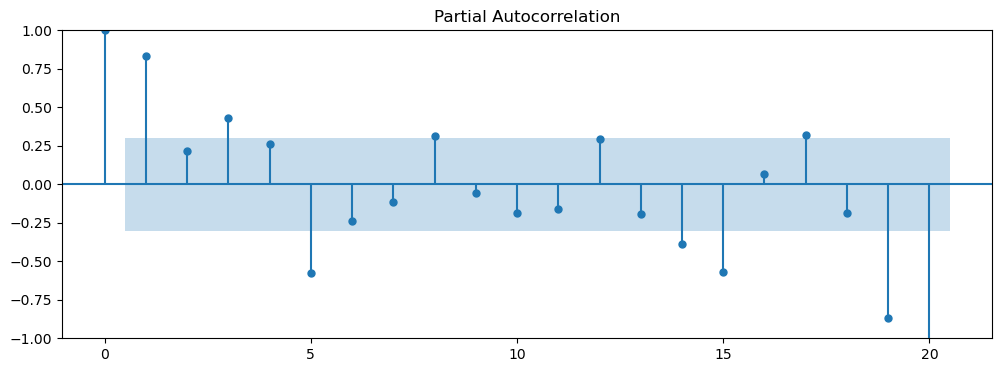

In [56]:
plt.figure(figsize=(12,4))
pacf_plot = plot_pacf( coke['Sales'],ax=plt.gca(),lags=20)
plt.show()

The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself.

In [46]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

In [47]:
arima = ARIMA(Train['Sales'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = Test.index[0],end = Test.index[-1])

In [48]:
rmse_arima = mean_squared_error(Test['Sales'],pred_arima,squared=False).round(2)
rmse_arima

896.39

# Now Selecting Best Model By comparing RMSE of Different Model

In [49]:
models=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse_ses,rmse_holt,rmse_hes_add_add,rmse_hes_mul_add,rmse_arima]
d={'Models':models,'Rmse':rmse}
df_model=pd.DataFrame(d)
df_model

,Models,Rmse
0,simple_moving_average,986.03
1,simple_expo_smoothing,1153.70
2,Holt,559.52
3,Holt_additive,253.96
4,Holt_multiplicative,469.49
5,ARIMA,896.39


In [50]:
df_model.sort_values(by='Rmse')

,Models,Rmse
3,Holt_additive,253.96
4,Holt_multiplicative,469.49
2,Holt,559.52
5,ARIMA,896.39
0,simple_moving_average,986.03
1,simple_expo_smoothing,1153.70


# So after analizing the RMSE value we come to the conclusion that our Best model is HOLT's Additive model because it is giving us lowest RMSE value

# Now Doing Forecasting for next 50 time period using HOLT'S ADDITIVE MODEL

# Forecasting for next 50 time periods


In [60]:
hes_add_add.forecast(50)

2093-07-01    3867.416993
2093-10-01    3774.057664
2094-01-01    3750.163626
2094-04-01    4304.959572
2094-07-01    4301.062964
2094-10-01    4098.374939
2095-01-01    4016.364130
2095-04-01    4599.715104
2095-07-01    4597.819881
2095-10-01    4449.442296
2096-01-01    4266.306205
2096-04-01    4910.116778
2096-07-01    4937.908054
2096-10-01    4844.548725
2097-01-01    4820.654688
2097-04-01    5375.450633
2097-07-01    5371.554025
2097-10-01    5168.866000
2098-01-01    5086.855191
2098-04-01    5670.206165
2098-07-01    5668.310942
2098-10-01    5519.933357
2099-01-01    5336.797266
2099-04-01    5980.607839
2099-07-01    6008.399115
2099-10-01    5915.039786
2100-01-01    5891.145749
2100-04-01    6445.941694
2100-07-01    6442.045086
2100-10-01    6239.357061
2101-01-01    6157.346252
2101-04-01    6740.697226
2101-07-01    6738.802003
2101-10-01    6590.424418
2102-01-01    6407.288327
2102-04-01    7051.098900
2102-07-01    7078.890176
2102-10-01    6985.530847
2103-01-01  